In [2]:
import pandas as pd

In [3]:
df_corpus_no_zalo = pd.read_csv("raw_data/final_df_no_zalo.csv")
df_corpus_no_zalo

,url,description,lawName,expDate,isExpire,content,is_content,lawNameRemoveText,is_law_id_error,is_zalo,Unnamed: 0
0,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,Hiệu lực:01/01/2014,NaN,HIẾN PHÁP\nNƯỚC CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT...,True,hpks0,False,False,NaN
1,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hình sự,Bộ luật 100/2015/QH13,Hiệu lực:01/01/2018,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nHÌNH SỰ\n__\nCăn cứ Hiến pháp nước Cộ...,True,100/2015/qh13,False,False,NaN
2,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Tố tụng dân sự,Bộ luật 92/2015/QH13,Hiệu lực:01/07/2016,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nTỐ TỤNG DÂN SỰ\n________\nCăn cứ Hiến...,True,92/2015/qh13,False,False,NaN
3,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hàng hải,Bộ luật 95/2015/QH13,Hiệu lực:01/07/2017,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nHÀNG HẢI VIỆT NAM\n_________\nCăn cứ ...,True,95/2015/qh13,False,False,NaN
4,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Lao động,Bộ luật 10/2012/QH13,Hiệu lực:01/05/2013,Trạng thái:Hết hiệu lực toàn bộ,BỘ LUẬT LAO ĐỘNG\nCăn cứ Hiến pháp nước Cộng h...,True,10/2012/qh13,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56036,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Đính chính văn bản (Thông tư số 121/2020/TT-BQP),Công văn 4197/BQP-PC,Hiệu lực:10/11/2020,NaN,ỦY BAN NHÂN DÂN\nTỈNH KON TUM\n-------\nCỘNG H...,True,4197/bqp-pc,False,False,1409.0
56037,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Việc hướng dẫn thực hiện các quy định của Nghị...,Công văn 3275/BTTTT-ƯDCNTT,Hiệu lực:28/10/2011,NaN,ỦY BAN NHÂN DÂN\nTỈNH THỪA THIÊN HUẾ\n-------\...,True,3275/btttt-ưdcntt,False,False,1410.0
56038,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,"V/v Hướng dẫn xác định chi phí phát triển, nân...",Công văn 2589/BTTTT-ƯDCNTT,Hiệu lực:24/08/2011,NaN,BỘ TÀI CHÍNH\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGH...,True,2589/btttt-ưdcntt,False,False,1411.0
56039,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Công văn về việc thuế nhập khẩu vật tư thiết b...,Công văn 10547/TC/TCT,Hiệu lực:...,NaN,BỘ NÔNG NGHIỆP VÀ PHÁT TRIỂN NÔNG THÔN\n------...,True,10547/tc/tct,False,False,1412.0


In [6]:
# utilities function
import seaborn as sns

def plot_value_count(series):
    type_counts = series.value_counts()
    print(type_counts)
    type_counts.plot(kind='bar')

In [93]:
import re
def process_structure_law(text):
    # handle article
    # regex = r"^(Điều \d+\D+\n)"
    regex = r"(^Điều[^\n]+)|(^Điều[^\n]+)"
    address_receive_pos = re.search(r"^(Nơi nhận:\n)", text, re.MULTILINE)
    matches = re.finditer(regex, text, re.MULTILINE)
    articles_pos = []
    articles = []    
    for matchNum, match in enumerate(matches, start=1):
        articles_pos.append((match.start(), match.end()))

    if articles_pos == []:
        return []
    for i in range(0, len(articles_pos)-1):
        articles.append(text[articles_pos[int(i)][0]:articles_pos[int(i)+1][0]])
    
    # handle end of file
    final_pos = len(text)-1
    try:
        if int(address_receive_pos.start()) > articles_pos[-1][1]:
            final_pos = address_receive_pos.start()
    except:
        pass
    articles.append(text[articles_pos[-1][0]:final_pos ])
    return articles

def split_law_to_any_id(text):
    regex = r"(^Điều[^\n]+)|(^Điều[^\n]+)"
    address_receive_pos = re.search(r"^(Nơi nhận:\n)", text, re.MULTILINE)
    matches = re.finditer(regex, text, re.MULTILINE)
    articles_pos = []
    articles = []    
    for matchNum, match in enumerate(matches, start=1):
        articles_pos.append((match.start(), match.end()))

    if articles_pos == []:
        return []
    
    for i in range(0, len(articles_pos)-1):
        text_at_article_pos = text[articles_pos[int(i)][0]:articles_pos[int(i)][1]]
        if ' ' not in text_at_article_pos:
            text_at_article_pos = text_at_article_pos.replace('Điều', "Điều ")
        # After I found that there's a document have duplicate article id, will use other id to define this
        # article_id = text_at_article_pos.strip().split(' ')[1].strip().strip('.').strip(':').strip(',').strip('`').strip('\n')
        article_name = text_at_article_pos.strip()
        article_content = text[articles_pos[int(i)][1]:articles_pos[int(i)+1][0]].strip()
        articles.append((article_name, article_content))
    
    # handle end of file
    final_pos = len(text)-1
    try:
        if int(address_receive_pos.start()) > articles_pos[-1][1]:
            final_pos = address_receive_pos.start()
    except:
        pass
    text_at_article_pos_final = text[articles_pos[-1][0]:articles_pos[-1][1]]
    # if ' ' not in text_at_article_pos_final:
    #     text_at_article_pos_final = text_at_article_pos_final.replace('Điều', "Điều ")
    # article_id_final = text_at_article_pos_final.strip().split(' ')[1].strip().strip('.').strip(':').strip(',').strip('`').strip('\n')
    article_name_final = text_at_article_pos_final.strip()
    article_content_final = text[articles_pos[-1][1]:final_pos].strip()
    articles.append((article_name_final, article_content_final))

    return articles
    
def split_law_to_dataframe(series):
    regex = r"(^Điều[^\n]+)|(^Điều[^\n]+)"
    text = series['content']
    address_receive_pos = re.search(r"^(Nơi nhận:\n)", text, re.MULTILINE)
    matches = re.finditer(regex, series['content'], re.MULTILINE)
    articles_pos = []
    articles = []    
    for matchNum, match in enumerate(matches, start=1):
        articles_pos.append((match.start(), match.end()))

    if articles_pos == []:
        return []
    
    for i in range(0, len(articles_pos)-1):
        text_at_article_pos = text[articles_pos[int(i)][0]:articles_pos[int(i)][1]]
        if ' ' not in text_at_article_pos:
            text_at_article_pos = text_at_article_pos.replace('Điều', "Điều ")
        # After I found that there's a document have duplicate article id, will use other id to define this
        # article_id = text_at_article_pos.strip().split(' ')[1].strip().strip('.').strip(':').strip(',').strip('`').strip('\n')
        article_name = text_at_article_pos.strip()
        article_content = text[articles_pos[int(i)][1]:articles_pos[int(i)+1][0]].strip()

        # ['url', 'description', 'law_name', 'law_id', 'article_id', 
        #                                   'article_name', 'article_content', 'expDate', 'isExpire', 'is_zalo']
        articles.append((
            series['url'],
            series['description'],
            series['lawName'],
            series['lawNameRemoveText'],
            i,
            article_name,
            article_content,
            series['expDate'],
            series['isExpire'],
            series['is_zalo']
            ))
    
    # handle end of file
    final_pos = len(text)-1
    try:
        if int(address_receive_pos.start()) > articles_pos[-1][1]:
            final_pos = address_receive_pos.start()
    except:
        pass
    text_at_article_pos_final = text[articles_pos[-1][0]:articles_pos[-1][1]]
    # if ' ' not in text_at_article_pos_final:
    #     text_at_article_pos_final = text_at_article_pos_final.replace('Điều', "Điều ")
    # article_id_final = text_at_article_pos_final.strip().split(' ')[1].strip().strip('.').strip(':').strip(',').strip('`').strip('\n')
    article_name_final = text_at_article_pos_final.strip()
    article_content_final = text[articles_pos[-1][1]:final_pos].strip()
    articles.append((
        series['url'],
        series['description'],
        series['lawName'],
        series['lawNameRemoveText'],
        len(articles_pos),
        article_name_final,
        article_content_final,
        series['expDate'],
        series['isExpire'],
        series['is_zalo']))

    return articles


# structed = split_law_to_any_id(df_corpus_no_zalo.iloc[38048]['content'])
# structed = split_law_to_dataframe(df_corpus_no_zalo.iloc[1])
print(len(structed))
# structed
structed = split_law_to_dataframe(df_corpus_no_zalo.iloc[0])
test_small_df = pd.DataFrame(structed, columns=['url', 'description', 'law_name', 'law_id', 'article_id', 
                                          'article_name', 'article_content', 'expDate', 'isExpire', 'is_zalo'])
test_small_df


1


,url,description,law_name,law_id,article_id,article_name,article_content,expDate,isExpire,is_zalo
0,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,0,Điều 1,Nước Cộng hòa xã hội chủ nghĩa Việt Nam là một...,Hiệu lực:01/01/2014,NaN,False
1,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,1,Điều 2,1. Nhà nước Cộng hòa xã hội chủ nghĩa Việt Nam...,Hiệu lực:01/01/2014,NaN,False
2,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,2,Điều 3,Nhà nước bảo đảm và phát huy quyền làm chủ của...,Hiệu lực:01/01/2014,NaN,False
3,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,3,Điều 4,1. Đảng Cộng sản Việt Nam - Đội tiên phong của...,Hiệu lực:01/01/2014,NaN,False
4,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,4,Điều 5,1. Nước Cộng hòa xã hội chủ nghĩa Việt Nam là ...,Hiệu lực:01/01/2014,NaN,False
...,...,...,...,...,...,...,...,...,...,...
115,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,115,Điều 116,"1. Hội đồng nhân dân, Uỷ ban nhân dân thực hiệ...",Hiệu lực:01/01/2014,NaN,False
116,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,116,Điều 117,1. Hội đồng bầu cử quốc gia là cơ quan do Quốc...,Hiệu lực:01/01/2014,NaN,False
117,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,117,Điều 118,1. Kiểm toán nhà nước là cơ quan do Quốc hội t...,Hiệu lực:01/01/2014,NaN,False
118,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,hpks0,118,Điều 119,1. Hiến pháp là luật cơ bản của nước Cộng hoà ...,Hiệu lực:01/01/2014,NaN,False


In [61]:
df_corpus_no_zalo.iloc[38048]

url                  https://vbpl.vn/hanam/Pages/vbpq-toanvan.aspx?...
description          V/v ban hành quy định mức thu, quản lý và sử d...
lawName                                     Quyết định 1523/2004/QĐ-UB
expDate                                            Hiệu lực:01/01/2005
isExpire                               Trạng thái:Hết hiệu lực toàn bộ
content              ỦY BAN NHÂN DÂN\nTỈNH HÀ NAM\n__________\nSố: ...
is_content                                                        True
lawNameRemoveText                                      1523/2004/qđ-ub
is_law_id_error                                                  False
is_zalo                                                          False
Unnamed: 0                                                         NaN
is_split_possible                                                 True
Name: 38048, dtype: object

In [22]:
df_corpus_no_zalo.iloc[371]['content'][14652:]

'Điều34\nChínhphủ quy định chi tiết và hướng dẫn thi hành Pháp lệnh này./.'

is_split_possible
True     45180
False    10861
Name: count, dtype: int64


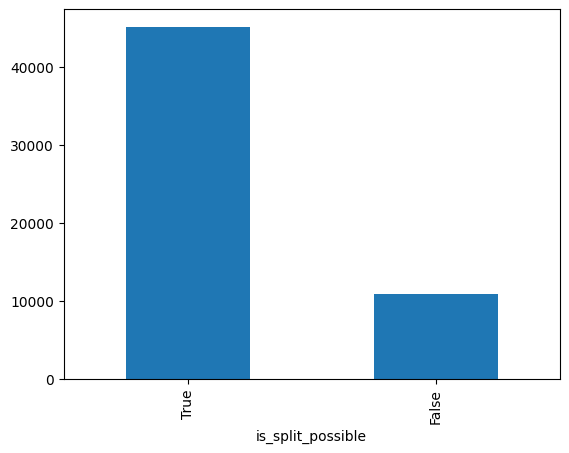

In [15]:
# We check if split is possible
def is_split_possible(text):
    if process_structure_law(text) == []:
        return False
    return True

df_corpus_no_zalo['is_split_possible'] = df_corpus_no_zalo['content'].apply(is_split_possible)

plot_value_count(df_corpus_no_zalo['is_split_possible'])

There are 45k document that can split, but we still got 10k that cannot, we will handle this by chunking text

In [29]:
# handle doc that cannot split

from langchain.text_splitter import RecursiveCharacterTextSplitter

def chunking_not_split_text(text):
    custom_text_splitter = RecursiveCharacterTextSplitter(
    # Set custom chunk size
    chunk_size = 650,
    chunk_overlap  = 100,
    # Use length of the text as the size measure
    length_function = len,
    )
    texts = custom_text_splitter.create_documents([text])
    return texts
    
chunking_not_split_text(df_corpus_no_zalo.iloc[1000]['content'])

[Document(page_content='NGHỊ QUYẾT\nVề những giải pháp chủ yếu chỉ đạo điều hành thực hiện kế hoạch phát triển\nKinh tế - Xã hội và dự toán ngân sách nhà nước năm 2012\n_______________________________'),
 Document(page_content='Năm 2011, mặc dù gặp nhiều khó khăn, thách thức nhưng dưới sự lãnh đạo của Đảng, sự chỉ đạo điều hành quyết liệt của Chính phủ, nỗ lực của các ngành, các cấp, cộng đồng doanh nghiệp và nhân dân, nền kinh tế nước ta đã có chuyển biến tích cực và đạt được những kết quả trong việc kiềm chế lạm phát, ổn định kinh tế vĩ mô, bảo đảm an sinh xã hội: Tốc độ tăng trưởng kinh tế năm 2011 đạt khoảng 6%; nông nghiệp phát triển ổn định, sản lượng lương thực đạt mức cao nhất từ trước đến nay; sản xuất công nghiệp đạt tốc độ tăng trưởng khá; khu vực dịch vụ, du lịch tiếp tục đà phát triển. Xuất khẩu tăng gấp hơn 3 lần so với chỉ tiêu kế hoạch đề ra; nhập'),
 Document(page_content='du lịch tiếp tục đà phát triển. Xuất khẩu tăng gấp hơn 3 lần so với chỉ tiêu kế hoạch đề ra; nhập

In [62]:
df_corpus_no_zalo

,url,description,lawName,expDate,isExpire,content,is_content,lawNameRemoveText,is_law_id_error,is_zalo,Unnamed: 0,is_split_possible
0,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hiến pháp năm 2013,Hiến pháp Không số,Hiệu lực:01/01/2014,NaN,HIẾN PHÁP\nNƯỚC CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT...,True,hpks0,False,False,NaN,True
1,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hình sự,Bộ luật 100/2015/QH13,Hiệu lực:01/01/2018,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nHÌNH SỰ\n__\nCăn cứ Hiến pháp nước Cộ...,True,100/2015/qh13,False,False,NaN,True
2,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Tố tụng dân sự,Bộ luật 92/2015/QH13,Hiệu lực:01/07/2016,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nTỐ TỤNG DÂN SỰ\n________\nCăn cứ Hiến...,True,92/2015/qh13,False,False,NaN,True
3,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Hàng hải,Bộ luật 95/2015/QH13,Hiệu lực:01/07/2017,Trạng thái:Hết hiệu lực một phần,BỘ LUẬT\nHÀNG HẢI VIỆT NAM\n_________\nCăn cứ ...,True,95/2015/qh13,False,False,NaN,True
4,https://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Ite...,Lao động,Bộ luật 10/2012/QH13,Hiệu lực:01/05/2013,Trạng thái:Hết hiệu lực toàn bộ,BỘ LUẬT LAO ĐỘNG\nCăn cứ Hiến pháp nước Cộng h...,True,10/2012/qh13,False,False,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
56036,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Đính chính văn bản (Thông tư số 121/2020/TT-BQP),Công văn 4197/BQP-PC,Hiệu lực:10/11/2020,NaN,ỦY BAN NHÂN DÂN\nTỈNH KON TUM\n-------\nCỘNG H...,True,4197/bqp-pc,False,False,1409.0,False
56037,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Việc hướng dẫn thực hiện các quy định của Nghị...,Công văn 3275/BTTTT-ƯDCNTT,Hiệu lực:28/10/2011,NaN,ỦY BAN NHÂN DÂN\nTỈNH THỪA THIÊN HUẾ\n-------\...,True,3275/btttt-ưdcntt,False,False,1410.0,True
56038,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,"V/v Hướng dẫn xác định chi phí phát triển, nân...",Công văn 2589/BTTTT-ƯDCNTT,Hiệu lực:24/08/2011,NaN,BỘ TÀI CHÍNH\n-------\nCỘNG HÒA XÃ HỘI CHỦ NGH...,True,2589/btttt-ưdcntt,False,False,1411.0,True
56039,https://vbpl.vn/TW/Pages/vbpq-van-ban-goc.aspx...,Công văn về việc thuế nhập khẩu vật tư thiết b...,Công văn 10547/TC/TCT,Hiệu lực:...,NaN,BỘ NÔNG NGHIỆP VÀ PHÁT TRIỂN NÔNG THÔN\n------...,True,10547/tc/tct,False,False,1412.0,False


That look good, let's handle the final data

In [102]:
# We create new dataframe and standardlize column name, then we can work
import numpy as np

df_splited_corpus = pd.DataFrame(columns=['url', 'description', 'law_name', 'law_id', 'article_id', 
                                          'article_name', 'article_content', 'expDate', 'isExpire', 'is_zalo'])
df_splited_corpus['url'] = df_splited_corpus['url'].apply(str)
df_splited_corpus['description'] = df_splited_corpus['description'].apply(str)
df_splited_corpus['law_name'] = df_splited_corpus['law_name'].apply(str)
df_splited_corpus['law_id'] = df_splited_corpus['law_id'].apply(str)
df_splited_corpus['article_id'] = df_splited_corpus['article_id'].apply(np.int64)
df_splited_corpus['article_name'] = df_splited_corpus['article_name'].apply(str)
df_splited_corpus['article_content'] = df_splited_corpus['article_content'].apply(str)
df_splited_corpus['expDate'] = df_splited_corpus['expDate'].apply(str)
df_splited_corpus['isExpire'] = df_splited_corpus['isExpire'].apply(bool)
df_splited_corpus['is_zalo'] = df_splited_corpus['is_zalo'].apply(bool)

df_splited_corpus.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              0 non-null      object
 1   description      0 non-null      object
 2   law_name         0 non-null      object
 3   law_id           0 non-null      object
 4   article_id       0 non-null      object
 5   article_name     0 non-null      object
 6   article_content  0 non-null      object
 7   expDate          0 non-null      object
 8   isExpire         0 non-null      object
 9   is_zalo          0 non-null      object
dtypes: object(10)
memory usage: 124.0+ bytes


In [73]:
# temp_0 = pd.Series(index=df_splited_corpus.columns)
# temp_0['url'] = "url"
# temp_0['description'] = "des"
# temp_0['law_name'] = "law 1/2/3/4/test/f"
# temp_0['law_id'] = "1/2/3/4/test/f"
# temp_0['article_id'] = 0
# temp_0['article_name'] = "luat hinh su"
# temp_0['article_content'] = "text"
# temp_0['expDate'] = "text"
# temp_0['isExpire'] = False
# temp_0['is_zalo'] = False

temp_0 = pd.Series({'url': "url", 'description': "des", 'law_name': "law 1/2/3/4/test/f", 'law_id': "1/2/3/4/test/f",
                    'article_id': 0, 'article_name': "luat hinh su", 'article_content': "text", 'expDate': "text",
                    'isExpire': False, 'is_zalo': False})
temp_0

url                               url
description                       des
law_name           law 1/2/3/4/test/f
law_id                 1/2/3/4/test/f
article_id                          0
article_name             luat hinh su
article_content                  text
expDate                          text
isExpire                        False
is_zalo                         False
dtype: object

In [104]:
from tqdm import tqdm

for i in tqdm(range(0, len(df_corpus_no_zalo))):
    if df_corpus_no_zalo.at[i, 'is_split_possible']:
        try:
            # I use .at because it faster
            list_article = split_law_to_dataframe(df_corpus_no_zalo.iloc[i])
            small_df = pd.DataFrame(list_article, columns=['url', 'description', 'law_name', 'law_id', 'article_id', 
                                            'article_name', 'article_content', 'expDate', 'isExpire', 'is_zalo'])
            df_splited_corpus = pd.concat([df_splited_corpus, small_df], ignore_index=True)
        except:
            print("Error at: ", i)
            print(df_corpus_no_zalo.iloc[i])
            break
            

100%|████████████████████████████████████████████████████████████████████████████| 56041/56041 [20:25<00:00, 45.73it/s]


In [106]:
df_splited_corpus.to_csv("raw_data/splited_corpus_no_zalo.csv", index=False)


In [127]:
df_splited_corpus[df_splited_corpus['law_name']=='Nghị định 98/2017/NĐ-CP']

,url,description,law_name,law_id,article_id,article_name,article_content,expDate,isExpire,is_zalo


That's great, we done with the data, let's save it and combine with zalo data

isExpire
Trạng thái:Hết hiệu lực toàn bộ       184894
Trạng thái:Hết hiệu lực một phần       35986
Trạng thái:Ngưng hiệu lực                851
Trạng thái:Chưa có hiệu lực              565
Trạng thái:Chưa xác định                 413
Trạng thái:Ngưng hiệu lực một phần       111
Trạng thái:Không còn phù hợp              67
Name: count, dtype: int64


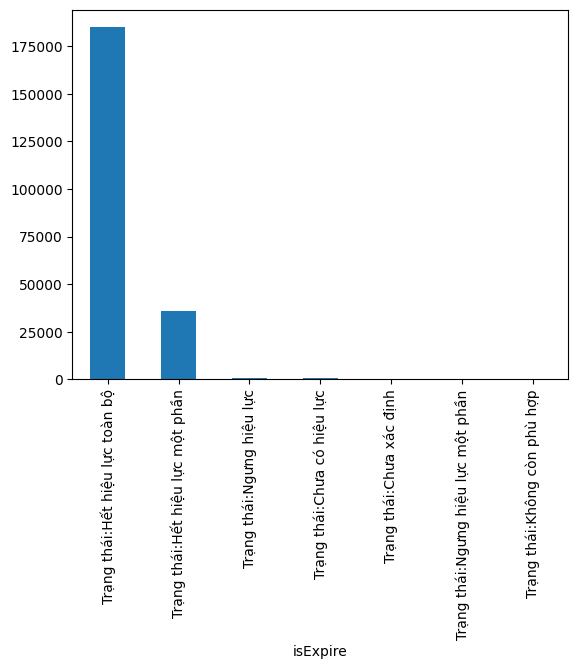

In [111]:
plot_value_count(df_splited_corpus['isExpire'])

## Combine zalo

In [115]:
df_crawl_zalo = pd.read_csv("raw_data/zalo_only.csv")
zalo_processed = pd.read_csv("raw_data/raw_corpus_v2.csv",index_col=0)

In [116]:
df_crawl_zalo

,law_id,article_id,title,text,combine,is_exist
0,01/2011/tt-bca,1,Điều 1. Phạm vi điều chỉnh,Thông tư này quy định về hoạt động vũ trang ca...,phạm vi điều chỉnh. thông tư này quy định về h...,False
1,01/2012/tt-nhnn,1,Điều 1. Phạm vi điều chỉnh và đối tượng áp dụng,1. Phạm vi điều chỉnh\nThông tư này quy định v...,phạm vi điều chỉnh và đối tượng áp dụng. phạm ...,False
2,01/2014/tt-btc,1,Điều 1. Phạm vi điều chỉnh,1. Thông tư này hướng dẫn chế độ quản lý tài c...,phạm vi điều chỉnh. thông tư này hướng dẫn chế...,False
3,01/2017/tt-btc,1,Điều 1. Phạm vi điều chỉnh và đối tượng áp dụng,1. Thông tư này hướng dẫn chế độ tài chính đối...,phạm vi điều chỉnh và đối tượng áp dụng. thông...,False
4,01/2017/ttlt-bca-bqp-btc-bnn,1,Điều 1. Phạm vi điều chỉnh,Thông tư liên tịch này quy định việc phối hợp ...,phạm vi điều chỉnh. thông tư liên tịch này quy...,False
...,...,...,...,...,...,...
696,98/2017/nđ-cp,1,Điều 1. Vị trí và chức năng,"Bộ Công Thương là cơ quan của Chính phủ, thực ...",vị trí và chức năng. bộ công thương là cơ quan...,False
697,98/2020/tt-btc,1,"Điều 1. Phạm vi điều chỉnh, đối tượng áp dụng",1. Thông tư này hướng dẫn hoạt động và quản lý...,"phạm vi điều chỉnh, đối tượng áp dụng. thông t...",False
698,99/2016/nđ-cp,1,Điều 1. Phạm vi điều chỉnh,1. Nghị định này quy định về quản lý và sử dụn...,phạm vi điều chỉnh. nghị định này quy định về ...,False
699,99/2016/tt-btc,1,Điều 1. Phạm vi Điều chỉnh,1. Thông tư này hướng dẫn về việc quản lý hoàn...,phạm vi điều chỉnh. thông tư này hướng dẫn về ...,False


In [117]:
zalo_processed

,law_id,article_id,title,text,combine
0,01/2009/tt-bnn,1,Điều 1. Phạm vi áp dụng,"Thông tư này hướng dẫn tuần tra, canh gác bảo ...",phạm vi áp dụng. thông tư này hướng dẫn tuần t...
1,01/2009/tt-bnn,2,Điều 2. Tổ chức lực lượng,"1. Hàng năm trước mùa mưa, lũ, Ủy ban nhân dân...","tổ chức lực lượng. hàng năm trước mùa mưa, lũ,..."
2,01/2009/tt-bnn,3,Điều 3. Tiêu chuẩn của các thành viên thuộc lự...,"1. Là người khoẻ mạnh, tháo vát, đủ khả năng đ...",tiêu chuẩn của các thành viên thuộc lực lượng ...
3,01/2009/tt-bnn,4,"Điều 4. Nhiệm vụ của lực lượng tuần tra, canh ...",1. Chấp hành sự phân công của Ban chỉ huy phòn...,"nhiệm vụ của lực lượng tuần tra, canh gác đê. ..."
4,01/2009/tt-bnn,5,"Điều 5. Phù hiệu của lực lượng tuần tra, canh ...","Phù hiệu của lực lượng tuần tra, canh gác đê l...","phù hiệu của lực lượng tuần tra, canh gác đê. ..."
...,...,...,...,...,...
61420,99/2020/nđ-cp,60,Điều 60. Thẩm quyền xử phạt của Hải quan,"1. Chi cục trưởng Chi cục Hải quan, Chi cục tr...",thẩm quyền xử phạt của hải quan. chi cục trưởn...
61421,99/2020/nđ-cp,61,Điều 61. Thẩm quyền xử phạt của Quản lý thị tr...,1. Kiểm soát viên thị trường đang thi hành côn...,thẩm quyền xử phạt của quản lý thị trường. kiể...
61422,99/2020/nđ-cp,62,Điều 62. Thẩm quyền xử phạt của Thanh tra,"1. Thanh tra viên, người được giao thực hiện n...",thẩm quyền xử phạt của thanh tra. thanh tra vi...
61423,99/2020/nđ-cp,63,Điều 63. Phân định thẩm quyền xử phạt của Chủ ...,1. Phân định thẩm quyền xử phạt của Chủ tịch Ủ...,phân định thẩm quyền xử phạt của chủ tịch ủy b...


In [122]:
zalo_processed.drop_duplicates(subset=['law_id'])

,law_id,article_id,title,text,combine
0,01/2009/tt-bnn,1,Điều 1. Phạm vi áp dụng,"Thông tư này hướng dẫn tuần tra, canh gác bảo ...",phạm vi áp dụng. thông tư này hướng dẫn tuần t...
17,01/2010/tt-bng,1,Điều 1. Đối tượng điều chỉnh,Thông tư này điều chỉnh đối với cơ quan đại di...,đối tượng điều chỉnh. thông tư này điều chỉnh ...
37,01/2010/tt-byt,1,Điều 1. Phạm vi điều chỉnh và đối tượng áp dụng,"1. Thông tư này quy định về trách nhiệm, trình...",phạm vi điều chỉnh và đối tượng áp dụng. thông...
54,01/2011/qh13,1,Điều 1. Phạm vi điều chỉnh và đối tượng áp dụng,1. Luật này quy định về hoạt động lưu trữ; quy...,phạm vi điều chỉnh và đối tượng áp dụng. luật ...
95,01/2011/tt-bca,1,Điều 1. Phạm vi điều chỉnh,Thông tư này quy định về hoạt động vũ trang ca...,phạm vi điều chỉnh. thông tư này quy định về h...
...,...,...,...,...,...
61280,99/2017/nđ-cp,1,Điều 1. Vị trí và chức năng,1. Viện Hàn lâm Khoa học xã hội Việt Nam là cơ...,vị trí và chức năng. viện hàn lâm khoa học xã ...
61284,99/2017/tt-bqp,1,Điều 1. Phạm vi điều chỉnh,1. Thông tư này hướng dẫn thực hiện một số nội...,phạm vi điều chỉnh. thông tư này hướng dẫn thự...
61322,99/2019/nđ-cp,1,Điều 1. Phạm vi điều chỉnh và đối tượng áp dụng,1. Nghị định này quy định chi tiết và hướng dẫ...,phạm vi điều chỉnh và đối tượng áp dụng. nghị ...
61341,99/2019/tt-bqp,1,Điều 1. Phạm vi điều chỉnh,"Thông tư này quy định về:\n1. Chức trách, nhiệ...",phạm vi điều chỉnh. thông tư này quy định về c...
